Link to kaggle dataset: https://www.kaggle.com/andrewmvd/data-scientist-jobs from user Larxel. Downloaded on 30/06 at roughly 9:15am.

Link to Stackoverflow dataset: https://insights.stackoverflow.com/survey - downloaded 2020 survey results.


### Idea
Compare Data Scientist and Data Analyst role profiles by required skills

### Reasoning
For people at the beginning of their career in data, it can be difficult to understand the difference between data scientist and data analyst roles. What is the day to day like? How much coding will I be doing? Having recently applied for jobs again myself, I find that the definition varies a lot between companies. Some, one might even argue, advertise using the "data scientist" title because it sounds more "sexy". So what is the difference? How clear-cut is it? And what skills are needed to land a job?

A lot of what you do in a job day to day is defined by the technology you work with. The technology is also an indicator for how much code you will actually be writing and how "technical" a role is. I am therefore looking at the technology that's being used by data analysts versus data scientists to understand where the differences lie. I will be looking at two data sources: First, I will look at job descriptions to understand what skills are crucial to put on your CV to score a job in either field and how this differs. Secondly, I will have a look at the stackoverflow developer survey 2020 to understand which tools data analysts and data scientists use most and are planning to learn. 
Between these two analyses, we should be able to see the differences between Data Analyst and Data Scientist jobs. Also, we should be able to see if the reality of the jobs matches the job descriptions.

##### Questions:
* How distinctive are these roles from each other and from other roles in the field? 
    
Looking only at the roles of Data Analysts and Data Scientists, 81% of people in the field say they are only one of the two. 19% state they are both. THis looks like people working in these roles seem to distinguish them quite clearly from one another. 

However, only a small share of Data Analysts and Data Scientists does not also consider themselves as working in another role. Data Analysts declare on average more other roles than Data Scientists. Those who state they are Data Analysts (but not Data Scientists) list on average 5.1 roles, whereas those who state they are Data Scientists (but not Data Analysts) list 3.9 roles.

Data Analysts often also work as back-end Developers (57%), full-stack Developers (48%) or Database Administrators (38%). Only in 5th place with 31% comes 'Data Scientist or Machine Learning Specialist'.
Data Scientists similarly also work as back-end Developers (47%) and full-stack Developers (37%). In third place comes 'Data or business analyst' with 32%.

The biggest differences between Data Analysts and Data Scientists are for the roles Scientist and Academic Researcher (Data Scientist +12%pts) and Database Administrator, front-end Developer and desktop and enterprise applications Developer (Data Analyst +20%pts, +14%pts, +13%pts)

The data unfortunately provides no insights into which role respondents consider their "primary" role. It is therefore quite possible that many consider themselves as Data Analysts, because data analysis is part of another, *primary* role they fulfil (likely a Developer role). Data Scientist, in comparison, seems to be somewhat more of a "standalone" role.

What does this mean for aspiring Data Analysts? Will they always have to wear multiple hats and even bring developer skills to the table? Or is the stackoverflow data biased towards developers who also do data analysis and does not actually capture many "pure" Data Analysts? Based on my own recent job search, the latter seems more likely. 

> Data Analysis skills are important in many roles

> Data Scientist is a more "standalone" role, at least in the Stackoverflow/Developer world

* What tools are Data Analysts using versus what tools are Data Scientists using (Stackoverflow)?
* What are they each looking to learn (Stackoverflow)?
* What skills are required according to job descriptions (Kaggle)?


### Other questions
* Do people in smaller companies have to take on more different roles?
* Do requirements become more similar or more different the more senior a role gets?
* Is job satisfaction higher amongst Data Scientists?
* Do Data Analysts try to learn tools that are used more by data scientists?
* Which other roles do the DSs and DAs usually also fulfill? >> Done, could potentially make a nicer chart

### Other information 
Using the list of tech and tools from stackoverflow survey plus some popular BI tools (list retrieved from....) and adding MS office applications.


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\j\Documents\udacity-ds-nanodegree\assignment1\data")

In [3]:
pd.set_option("display.max_columns", None)

# Part 1 - The Kaggle Job Data

# Part 2 - The Stackoverflow Data

## Reading in data and having a look at it

In [4]:
dfs = pd.read_csv(r"stackoverflow_survey\survey_results_public.csv")

In [ ]:
dfs.head(40)

In [ ]:
dfs.shape

## Defining functions

In [5]:
def subset_creator(df, column_list):
    '''
    INPUT:
    df: full dataframe
    column_list: list of columns from which unique string values need to e extracted
    
    OUTPUT:
    super_list2: list that contains each unqiue value from the columns in column_list once
    
    What the function does:
    The functions takes in columns which contain string values, 
    where each row multiple can contained multiple values separated by a delimiter (e.g. 'dog;cat;rabbit').
    The function extracts all unique strings values from all columns from column_list and returns them in super_list2.
    Each value is only contained once in super_list2.
    '''
    df = df.fillna('No information')
    super_list=[]
    for i in column_list:
        nested_list = list(df[i].str.split(';'))
        flat_list = [item for sublist in nested_list for item in sublist]
        all_set = set(flat_list)
        all_list = list(all_set)
        super_list.append(all_list)
    super_list = [item for sublist in super_list for item in sublist]
    super_list_all_set = set(super_list)
    super_list_all_list = list(super_list_all_set)
    super_list2 = [i for i in super_list_all_list if i != 'No information']
    return super_list2

In [98]:
def grouping_formatting(df, column):
    '''
    INPUT:
    df: df to be reformatted
    column: To set column name
    
    Output:
    Reformatted dataframe
    
    What this function does:
    This function reformats the dataframe after running groupby. It is used inside the grouping function.
    '''
    df = df.reset_index()
    df = df.drop(columns=[0], axis=1)
    df = df.rename(columns={"index":"Categories", 1:column})  
    return df

In [130]:
def grouping(df, all_items, column, bs):
    '''
    INPUT:
    df: dataframe with all data
    all_devtypes: list of all different Developer roles
    column: binary coded column
    bs: True/False value deciding whether to include base sizes
    
    OUTPUT:
    df_cooc: grouped by df that is transposed and contains column % based on total and - if wanted - base sizes
    
    What this function does:
    1. Save the base size n for DevType of interest
    2. Create new df by running groupby, immediately followed by transposing and dividing counts by n
    3. Tidying up the new df using grouping_formatting function
    4. Adding in base size if requested
    '''
    n = df[column].sum()
    df_cooc = df.groupby([column])[all_items].sum().transpose()/n
    df_cooc = grouping_formatting(df_cooc, column)
    if bs:
        df_bs = df.groupby([column])[all_items].sum().transpose()
        df_bs = grouping_formatting(df_bs, column)
        # changing column names to indicate it is base size
        bs_columns = list(df_bs.columns)
        bs_columns.remove("Categories")
        for i in bs_columns:
            df_bs = df_bs.rename(columns={i:i+"_bs"})
        # merging
        df_cooc = pd.merge(df_cooc, df_bs, left_on='Categories', right_on='Categories')
    return df_cooc

## Filtering

In [ ]:
#Sensible filters:
# MainBranch: developers by profession; code sometimes as part of their work
# Employment: employed full-time; employed part-time; independent contractor, freelancer or self-employed
# DevType: Not NA
# Working as (DevType): Data or business analyst; Data scientist or machine learning specialist

In [6]:
# Filerting on MainBranch
dfs=dfs.loc[(dfs['MainBranch']=="I am a developer by profession")|(dfs['MainBranch']=="I am not primarily a developer, but I write code sometimes as part of my work")]

In [7]:
# Filtering on Employment status
dfs=dfs.loc[(dfs['Employment']=="Employed full-time")|(dfs['Employment']=="Employed part-time")|(dfs['Employment']=="Independent contractor, freelancer, or self-employed")]

In [8]:
# Filerting on DevType = NaN
dfs=dfs.dropna(subset=['DevType'])

In [9]:
# Need to create columns for two professions I am interested in
# https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
dfs_d1 = dfs['DevType'].str.get_dummies(sep=';')

In [10]:
# Merging the dummy dataframe onto the original dataframe
dfs = pd.merge(dfs, dfs_d1, left_index=True, right_index=True)

In [11]:
# Filtering on respondents that work as Data Scientist or Data Analyst
dfs = dfs.loc[(dfs['Data or business analyst']==1)|(dfs['Data scientist or machine learning specialist']==1)]

In [12]:
dfs.shape

(5952, 84)

## Distinctiveness of the roles
### How distinctive are these roles from each other?

In [14]:
# How many people are Data Analysts, how many Data Scientists and how many are both?
dfs['Data or business analyst'].mean()

0.5942540322580645

In [15]:
dfs['Data scientist or machine learning specialist'].mean()

0.5929099462365591

In [16]:
dfs['DA and DS']=0
dfs.loc[(dfs['Data or business analyst']==1) & (dfs['Data scientist or machine learning specialist']==1),'DA and DS']=1
dfs['DA and DS'].mean()

0.18716397849462366

In [17]:
# Creating a variable to identify DAs, DSs and those who are both DA and DS
dfs['DevType_RoleDescription']=np.nan
dfs.loc[dfs['DA and DS']==1,'DevType_RoleDescription']='DA and DS'
dfs.loc[(dfs['DA and DS']==0) & (dfs['Data scientist or machine learning specialist']==1),'DevType_RoleDescription']='DS only'
dfs.loc[(dfs['DA and DS']==0) & (dfs['Data or business analyst']==1),'DevType_RoleDescription']='DA only'

#### Creating base sizes for further analysis
Get base size for each of the three groups (DA only, DS only, DA and DS)

In [ ]:
n_da_only = dfs.loc[dfs['DevType_RoleDescription']=='DA only']['Respondent'].count()
n_ds_only = dfs.loc[dfs['DevType_RoleDescription']=='DS only']['Respondent'].count()
n_da_and_ds = dfs.loc[dfs['DevType_RoleDescription']=='DA and DS']['Respondent'].count()

In [77]:
print("Base size DA only: ",n_da_only)
print("Base size DS only: ",n_ds_only)
print("Base size DA and DS: ",n_da_and_ds)

Base size DA only:  2423
Base size DS only:  2415
Base size DA and DS:  1114


Get base size for two groups (DS, DA >> They have a certain overlap)

In [79]:
n_da = dfs['Data or business analyst'].sum()
n_ds = dfs['Data scientist or machine learning specialist'].sum()

In [80]:
print("Base size DA: ",n_da)
print("Base size DS: ",n_ds)

Base size DA:  3537
Base size DS:  3529


### How distinctive are they from other roles in the field?

In [19]:
# Preparation: Retrieving all DevTypes (only works for list with nesting level 2)
'''
nested_devtypes=list(dfs['DevType'].str.split(';'))
flat_list = [item for sublist in nested_devtypes for item in sublist]
all_devtypes = set(flat_list)
all_devtypes = list(all_devtypes)
'''
# Now using my new function

all_devtypes = subset_creator(dfs, ['DevType'])

##### How many respondents claim to ONLY be a Data Analyst or a Data Scientist?

In [20]:
# Create column that shows number of roles chosen
dfs['NumberOfRoles']=dfs[all_devtypes].sum(axis=1)

In [21]:
pd.crosstab(dfs['NumberOfRoles'],dfs['DevType_RoleDescription'])

DevType_RoleDescription,DA and DS,DA only,DS only
NumberOfRoles,,,
1,0,225,325
2,164,313,476
3,174,344,495
4,151,292,395
5,124,315,248
6,98,246,147
7,85,203,118
8,56,136,59
9,52,120,47


##### How many roles do respondents say they fill on average?

In [22]:
dfs.groupby('DevType_RoleDescription')['NumberOfRoles'].mean()


DevType_RoleDescription
DA and DS    6.427289
DA only      5.118035
DS only      3.892754
Name: NumberOfRoles, dtype: float64

##### What else do they claim to be?

In [ ]:
# https://tm4ss.github.io/docs/Tutorial_5_Co-occurrence.html

In [23]:
# Creating a co-occurence table
dfs_cooc = dfs.groupby('DevType_RoleDescription')[all_devtypes].sum().transpose()

In [25]:
dfs_cooc

DevType_RoleDescription,DA and DS,DA only,DS only
DevOps specialist,206,383,298
"Developer, QA or test",155,350,118
Senior executive/VP,94,139,83
System administrator,213,565,226
Product manager,150,345,117
Marketing or sales professional,68,104,15
Database administrator,371,965,267
"Engineer, data",482,498,569
"Engineer, site reliability",112,120,77
"Developer, embedded applications or devices",171,229,262


In [81]:
# !!!!! IMPROVE THIS TO ADHERE TO DRY PRINCIPLES !!!! Adding % columns into the co-occurence table
dfs_cooc['DA_share']=dfs_cooc['DA only']/n_da_only
dfs_cooc['DA and DS_share']=dfs_cooc['DA and DS']/n_da_and_ds
dfs_cooc['DS_share']=dfs_cooc['DS only']/n_ds_only

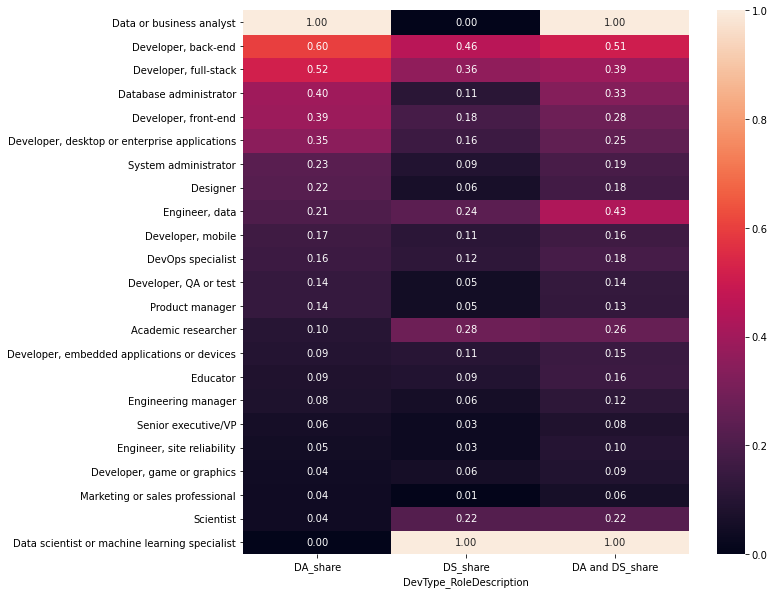

In [82]:
# Plotting the table using a heatmap
plt.figure(figsize=(10,10))
ax=sns.heatmap(dfs_cooc[['DA_share','DS_share','DA and DS_share']].sort_values(by=['DA_share']), annot=True, fmt='.2f')
ax.set_ylim(0,23);

In [106]:
dfs_cooc2_da = grouping(dfs, all_devtypes, 'Data or business analyst', False)
dfs_cooc2_ds = grouping(dfs, all_devtypes, 'Data scientist or machine learning specialist', False)
dfs_cooc2 = pd.merge(dfs_cooc2_da, 
        dfs_cooc2_ds,
        left_on = 'Categories',
        right_on = 'Categories')
dfs_cooc2 = dfs_cooc2.set_index('Categories')

In [107]:
dfs_cooc2

,Data or business analyst,Data scientist or machine learning specialist
Categories,,
DevOps specialist,0.166525,0.142817
"Developer, QA or test",0.142776,0.077359
Senior executive/VP,0.065875,0.050156
System administrator,0.219960,0.124398
Product manager,0.139949,0.075659
Marketing or sales professional,0.048629,0.023519
Database administrator,0.377721,0.180788
"Engineer, data",0.277071,0.297818
"Engineer, site reliability",0.065592,0.053556


In [32]:
# Caluclating differences between two roles
dfs_cooc2['Difference'] = dfs_cooc2['Data scientist or machine learning specialist'] - dfs_cooc2['Data or business analyst']

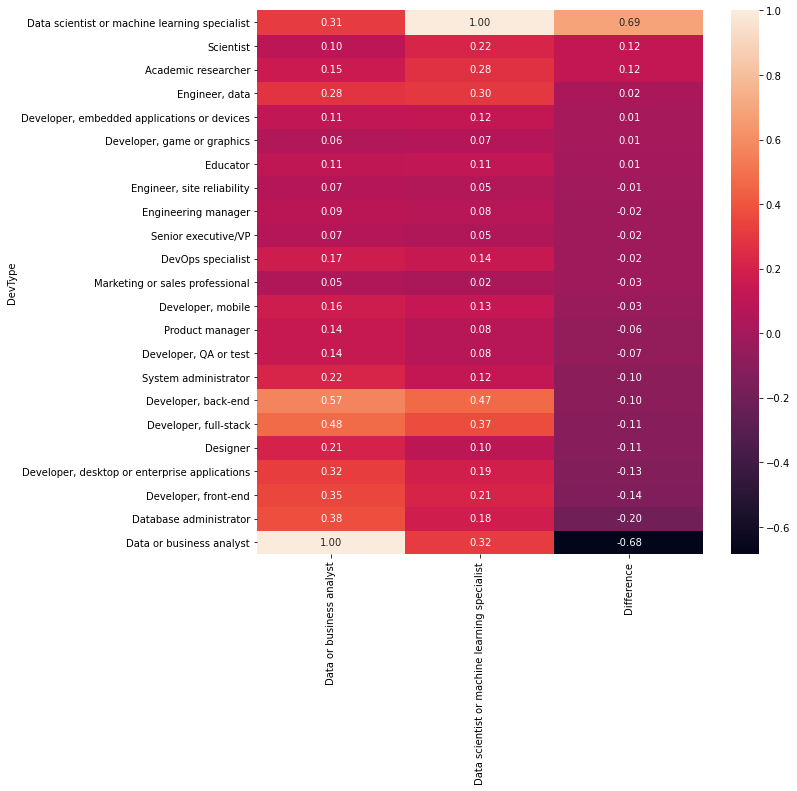

In [33]:
# Plotting the table using a heatmap
plt.figure(figsize=(10,10))
ax=sns.heatmap(dfs_cooc2.sort_values(by=['Difference']), annot=True, fmt='.2f')
ax.set_ylim(0,23);

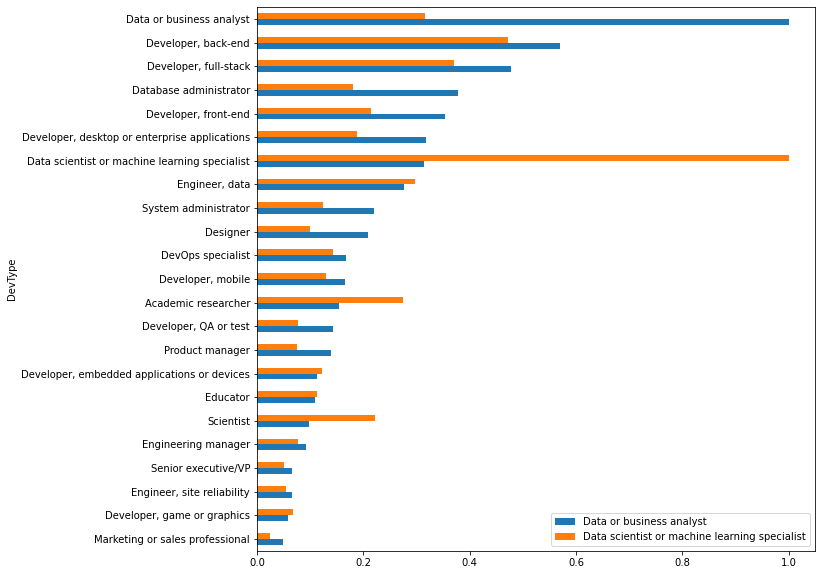

In [35]:
plt.rcParams["figure.figsize"] = [10, 10]
dfs_cooc2[['Data or business analyst','Data scientist or machine learning specialist']].sort_values(by=['Data or business analyst']).plot.barh();

## Do tools used by Data Analysts versus Data Scientists differ?

In [50]:
'''
I have a porblem here, because Microsoft Azure was in the survey TWICE. So Pandas labels them _x and _y. I need to 
prevent this duplication >>> It works now, but is not unversally applicable at all!

THis function creates dummy variables for my various categorical columns. 
It is also used further up in the code already for the DevType variable. 
Once it is de-bugged, move it up to your functions'''
def dummies(df, column_list):
    for i in column_list:
        df_interim = df[i].str.get_dummies(sep=';')
        df = pd.merge(df, df_interim, left_index=True, right_index=True)
    ''' 
    At this stage I should somehow remove the duplicated columns
    '''
    header_list = df.columns
    issue_list = [i for i in header_list if i.endswith('_x') or i.endswith('_y')] #identify all duplicate cases >> WOULD BE BETTER WITH REGEX _\D$
    df['Microsoft Azure'] = df[issue_list[0]] + df[issue_list[1]] # NEED TO AUTOMATE THE "AZURE"
    df = df.drop(columns=[issue_list[0],issue_list[1]], axis=1)
    return df, issue_list

In [40]:
# Listing all columns that refer to tech and tools variables
column_list = ['MiscTechWorkedWith',
               'LanguageWorkedWith',
               'NEWCollabToolsWorkedWith',
               'DatabaseWorkedWith',
               'PlatformWorkedWith',
               'WebframeWorkedWith']

In [51]:
# Need to create columns for all tools
# https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
dfs_tools, issue_list = dummies(dfs, column_list)

In [54]:
all_tools = subset_creator(dfs_tools, column_list)

In [62]:
# CURRENTLY NOT WORKING, because the function doesn't consider duplicated rows
dfs_cooc3 = dfs_tools.groupby('DevType_RoleDescription')[all_tools].sum().transpose()

In [83]:
# !!!!! IMPROVE THIS TO ADHERE TO DRY PRINCIPLES !!!! Adding % columns into the co-occurence table
dfs_cooc3['DA_share']=dfs_cooc3['DA only']/n_da_only
dfs_cooc3['DA and DS_share']=dfs_cooc3['DA and DS']/n_da_and_ds
dfs_cooc3['DS_share']=dfs_cooc3['DS only']/n_ds_only

In [84]:
dfs_cooc3

DevType_RoleDescription,DA and DS,DA only,DS only,DA_share,DA and DS_share,DS_share
Heroku,123,192,200,0.079241,0.110413,0.082816
Vue.js,118,242,213,0.099876,0.105925,0.088199
Assembly,89,92,138,0.037969,0.079892,0.057143
Chef,37,29,34,0.011969,0.033214,0.014079
WordPress,164,408,228,0.168386,0.147217,0.094410
...,...,...,...,...,...,...
VBA,198,485,117,0.200165,0.177738,0.048447
Microsoft Teams,341,729,567,0.300867,0.306104,0.234783
Rust,50,63,164,0.026001,0.044883,0.067909
Xamarin,54,128,59,0.052827,0.048474,0.024431


In [145]:
dfs_cooc4_da = grouping(dfs_tools, all_tools, 'Data or business analyst', True)
dfs_cooc4_ds = grouping(dfs_tools, all_tools, 'Data scientist or machine learning specialist', True)
dfs_cooc4 = pd.merge(dfs_cooc4_da, 
        dfs_cooc4_ds,
        left_on = 'Categories',
        right_on = 'Categories')
dfs_cooc4 = dfs_cooc4.set_index('Categories')

# Adding a difference column
dfs_cooc4['Difference'] = dfs_cooc4['Data scientist or machine learning specialist'] - dfs_cooc4['Data or business analyst']

# Removing tools with low base sizes
min_bs = 100 # adjust as desired
dfs_cooc4 = dfs_cooc4.loc[(dfs_cooc4['Data or business analyst_bs'] > min_bs) | (dfs_cooc4['Data scientist or machine learning specialist_bs'] > min_bs)]

# Removing tools with low endorsement
min_end = 0.3 # adjust as desired
dfs_cooc4 = dfs_cooc4.loc[(dfs_cooc4['Data or business analyst'] > min_end) | (dfs_cooc4['Data scientist or machine learning specialist'] > min_end)]


In [146]:
dfs_cooc4

,Data or business analyst,Data or business analyst_bs,Data scientist or machine learning specialist,Data scientist or machine learning specialist_bs,Difference
Categories,,,,,
Microsoft Azure,0.367543,1300,0.316237,1116,-0.051306
Java,0.303364,1073,0.337206,1190,0.033842
Confluence,0.254170,899,0.308019,1087,0.053849
Bash/Shell/PowerShell,0.361889,1280,0.409464,1445,0.047576
TensorFlow,0.130619,462,0.382545,1350,0.251925
Jira,0.386486,1367,0.436668,1541,0.050182
Slack,0.415041,1468,0.530179,1871,0.115138
"Google Suite (Docs, Meet, etc)",0.378569,1339,0.444319,1568,0.065749
Gitlab,0.274244,970,0.370643,1308,0.096400


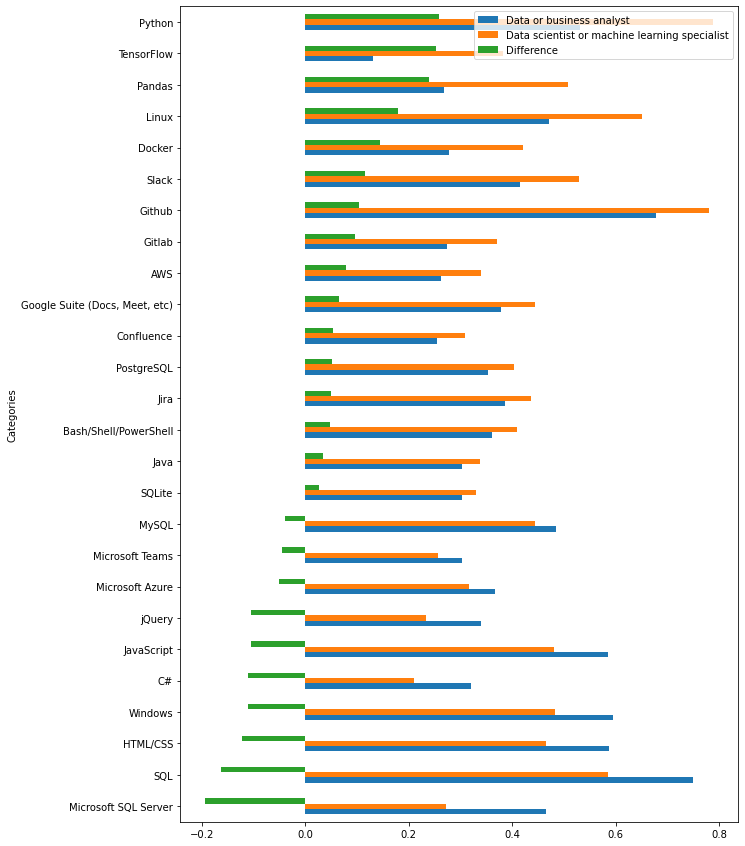

In [149]:
plt.rcParams["figure.figsize"] = [10, 15]
dfs_cooc4[['Data or business analyst','Data scientist or machine learning specialist', 'Difference']].sort_values(by=['Difference']).plot.barh();